# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
# from datetime import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")
print(PLAID_CLIENT_ID)

5efce7af0b1c9e0011b33b48


---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

In [6]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token

# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])


### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token
# Store the access token in a Python variable
access_token = exchange_response['access_token']
# Print the public token
print(access_token)

access-sandbox-7d23a30c-9419-46ba-b1f1-9f481a83a30e


### 4. Fetch Accounts

In [9]:
# Retrieve accounts
client.Accounts.get(access_token)
# Print accounts


{'accounts': [{'account_id': 'jldAvr8dBxtm5P5rjomRHRo46mjny3F1KPrXe',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '7EjBoy9j7wIBZdZzayB6CK6ZM8Xz9vTgbR79a',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'e5roLemrlKfqyay6xpq7hM9RPqlvdjFLv8ojK',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [10]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
# Retrieve the transactions for the last 90 days
transactions_response = client.Transactions.get(access_token, start_date, end_date)
# Print the transactions
transactions_response

{'accounts': [{'account_id': 'jldAvr8dBxtm5P5rjomRHRo46mjny3F1KPrXe',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '7EjBoy9j7wIBZdZzayB6CK6ZM8Xz9vTgbR79a',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'e5roLemrlKfqyay6xpq7hM9RPqlvdjFLv8ojK',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

### 2. Print the categories for each transaction

In [11]:
# Create a for-loop to print the categories for each transaction
# Iterate and parse JSON response
for transactions in transactions_response['transactions']:
    #if transactions['name'] == 'INTRST PYMNT':
    print(json.dumps(transactions['category'], indent=4, sort_keys=True))

[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [12]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
transactionDF = pd.DataFrame(columns=["date", "name", "amount", "category"])
i = 0
# Retrieve all the transactions
for transactions in transactions_response['transactions']:
    # Populate the transactions DataFrame with the transactions data
    #datetime.strptime(date_string, "%d %B, %Y")
    new_row = {'date':transactions["date"], 'name':transactions["merchant_name"], 'amount':transactions["amount"], 'category':transactions["category"][0]}
    #append row to the dataframe
    transactionDF = transactionDF.append(new_row, ignore_index=True)
# Display sample data from the DataFrame    
transactionDF['date'][0]

'2020-07-14'

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [13]:
# Display data types
transactionDF.dtypes

date        object
name        object
amount      object
category    object
dtype: object

In [14]:
# Make any required data type transformation  df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
transactionDF['date'] = pd.to_datetime(transactionDF['date'], format='%Y-%m-%d')
# transactionDF['amount'] = pd.to_numeric(transactionDF['amount'])

In [15]:
# Set the date column as index
transactionDF.set_index('date', inplace=True)
# Display sample data
transactionDF.count

<bound method DataFrame.count of                             name  amount        category
date                                                    
2020-07-14                  None      25         Payment
2020-07-14                  Uber     5.4          Travel
2020-07-13                  None    5850        Transfer
2020-07-13                  None    1000        Transfer
2020-07-12            Touchstone    78.5      Recreation
2020-07-12       United Airlines    -500          Travel
2020-07-11            McDonald's      12  Food and Drink
2020-07-11             Starbucks    4.33  Food and Drink
2020-07-10              Sparkfun    89.4  Food and Drink
2020-07-09                  None   -4.22        Transfer
2020-06-29       United Airlines     500          Travel
2020-06-27                  Uber    6.33          Travel
2020-06-24            Tectra Inc     500  Food and Drink
2020-06-23                  None  2078.5         Payment
2020-06-23                   KFC     500  Food and Drin

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [27]:
# Fetch de income data
# retrieve income data for an item
transactions_response = client.Income.get(access_token)

income = transactions_response['income']
# Print the income data
%store income
income

Stored 'income' (dict)


{'income_streams': [{'confidence': 0.99,
   'days': 720,
   'monthly_income': 500,
   'name': 'UNITED AIRLINES'}],
 'last_year_income': 6500,
 'last_year_income_before_tax': 7893,
 'max_number_of_overlapping_income_streams': 1,
 'number_of_income_streams': 1,
 'projected_yearly_income': 6085,
 'projected_yearly_income_before_tax': 7389}

In [18]:
# Determine the previous year's gross income and print the results
print(income['last_year_income_before_tax'])

7893


In [19]:
# Determine the current monthly income and print the results
print(income['income_streams'][0]['monthly_income'])

500


In [20]:
# Determine the projected yearly income and print the results
print(income['projected_yearly_income'])

6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [21]:
# Compute the total expenses per category
tot_exp_df = transactionDF.groupby(['category']).sum()
# Display the expenses per category
tot_exp_df

,name,amount
category,,
Food and Drink,McDonald'sStarbucksSparkfunTectra IncKFC,1105.73
Payment,0,2103.50
Recreation,Touchstone,78.50
Shops,Madison Bicycle Shop,500.00
Transfer,0,6845.78
Travel,UberUnited AirlinesUnited AirlinesUber,11.73


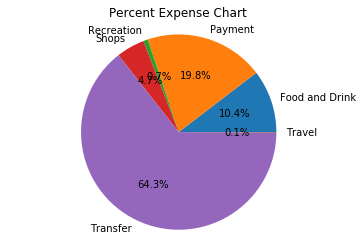

In [22]:

# Create a spending categories pie chart.
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(tot_exp_df['amount'], labels=tot_exp_df.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Percent Expense Chart')


plt.show()

### Calculate the expenses per month

In [23]:
# Create a DataFrame with the total expenses
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
# Retrieve the transactions for the last 90 days
transactions_response = client.Transactions.get(access_token, start_date, end_date)
# Print the transactions
transactions_response
# Display sample data
transactions_response

{'accounts': [{'account_id': 'jldAvr8dBxtm5P5rjomRHRo46mjny3F1KPrXe',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '7EjBoy9j7wIBZdZzayB6CK6ZM8Xz9vTgbR79a',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'e5roLemrlKfqyay6xpq7hM9RPqlvdjFLv8ojK',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

In [24]:
# Create a spending per month bar chart
# Define an empty DataFrame and set the columns as date, name, amount, and category
tot_exp_df = pd.DataFrame(columns=["date", "name", "amount"])
i = 0
# Retrieve all the transactions
for transactions in transactions_response['transactions']:
    # Populate the transactions DataFrame with the transactions data
    #datetime.strptime(date_string, "%d %B, %Y")
    new_row = {'date':transactions["date"], 'name':transactions["merchant_name"], 'amount':transactions["amount"]}
    #append row to the dataframe
    tot_exp_df = tot_exp_df.append(new_row, ignore_index=True)
# Display sample data from the DataFrame    
tot_exp_df['date'] = pd.to_datetime(tot_exp_df['date'], format='%Y-%m-%d')
tot_exp_df

,date,name,amount
0,2020-07-14,None,25
1,2020-07-14,Uber,5.4
2,2020-07-13,None,5850
3,2020-07-13,None,1000
4,2020-07-12,Touchstone,78.5
5,2020-07-12,United Airlines,-500
6,2020-07-11,McDonald's,12
7,2020-07-11,Starbucks,4.33
8,2020-07-10,Sparkfun,89.4
9,2020-07-09,None,-4.22


In [25]:
tot_exp_df.set_index('date', inplace=True)

by_month_exp_df = tot_exp_df.groupby(by=[tot_exp_df.index.year, tot_exp_df.index.month], sort=False).sum()
by_month_exp_df

amount
date date          
2020 7      6560.41
     6     10645.24
     5     10645.24
     4     10645.24
     3     11145.24
     2     10145.24
     1     10965.23

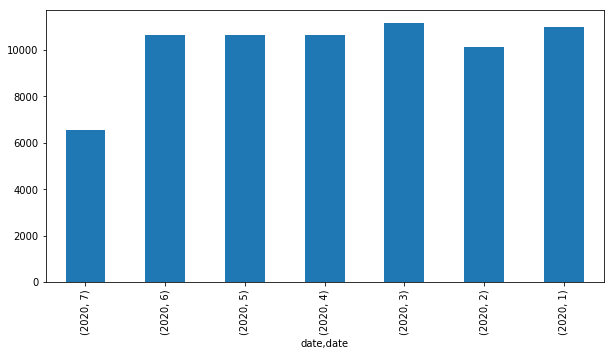

In [26]:
by_month_exp_df.plot(kind='bar',figsize=(10,5),legend=None)